In [1]:
import os
import ga_graphs as gg
from gmod import *
import numpy as np
import pandas as pd

# plotting specifications
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from cycler import cycler
mpl.rcParams.update({'font.size': 14})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')
pd.set_option('display.max_columns', None)

# Implementation of Genetic Algorithm for XXZ Hamiltonians

exp_gen.py script generates and runs the implementation of genetic algorithm. It takes the number of couplings of the system (**must be an even number**) and the name of a directory to save results as arguments

All parameters related to the system and specifications for the algorithm must be loaded in exp_gen.py to generate a configuration file.

These include:

### System Parameters

* number_of_samples: number of times the algorithm will be executed. Since this is an stochastic optimization method, it is usually convenient to run the algorithm several times. 

* delta: anisotropy value. Initially configured to 1 (Heisenberg Hamiltonian).

* transmission_time = time at which transmission fidelity must reach its maximum value. Initially configured to n (number of elements in the chain, equal to number_of_couplings plus one).


### Fitness Function related parameters

*Some fitness functions (in gmod.py) use a weight factor associated to physical properties of the system different from the transmission probability. We name this weight factor beta and it can be provided as a fixed value or taken as an extra gene* 

* beta_is_gene: If True, takes weight factor as gene
* beta: Fixed value for beta (If beta_is_gene is true, this is not taken into account).

###  Genetic algorithm parameters (used by PyGAD library, see Documentation)

* num_generations: number of generations
* sol_per_pop: number of solutions tested in every generation
* maxj: max value for coupling constants. Initially taken as n.
* init_range_low/high : Range to initialize genetic algorithm values.
* fidelity_tolerance: When transmission fidelity reaches this value, the experiment is terminated.
* saturation: If tolerance is not reached, the experiment is terminated after this number of generations provide the same max fidelity.

### Crossover and parent selection (used by PyGAD library, see Documentation)

* num_parents_mating: number of parents mating in crossover
* parent_selection_type: parent selection type
* keep_elitism: number of best solutions to keep
* crossover_type
* crossover_probability

###  Mutation parameters
* mutation_probability = 0.99
* mutation_num_genes = 1

### Adaptive mutation parameters

*Adaptive mutation applies changes proportional to the mutated gene. At the beginning this changes are stronger, when the solution is converging the changes become smaller*

* strong_change_first: percentage of gene mutation for first chain element
* strong_change_rest = percentage of gene mutation for the rest of the chain
* weak_change: mutation percentage after solution converges

### On Generation actions

* og_print: If True, prints best solution, fidelity and fitness every generation
* check_tol: If True, checks if fidelity reaches certain value every generation
* histogram: If True, exports a histogram with the population's fitness


With all these parameters loaded, exp_gen.py generates a configuration file, creates a directory and runs the main script (average.py) from inside of it. 

For example, the following script runs the experiment for a chain of 20 elements (19 coupling constants, 10 genes) and saves results in a directory named "test"

``` python3 exp_gen.py 20 test```

To run it with the pre-configured parameters in exp_gen.py, run the cell below. Since og_print is set as ```True```, it will print the best solution, fitness and fidelity obtained in each generation.

In [2]:
#os.system('python3 exp_gen.py 20 fixed_dim')

If we list the contents of the 'test' directory, we will find:

- the script, module and configuration file (```ga{number_of_couplings}. ini```) used
- the best solution for every run saved as ```jn{number_of_couplings}sample{number_of_sample}.dat```
- the evolution of the fitness for each sample, saved as ```fitness_history_nj{number_of_couplings}_sample{sample_number}.dat```
- ```nvsmaxfid.dat``` file containing the number of couplings, anisotropy value, max. transmission fidelity, CPU time and generations for every sample.
- If ```histogram``` is ```True```, the directory histogram_frames containing histograms showing the evolution of the population distribuion for the last sample obtained.


In [3]:
os.system('ls fixed_dim')

average.py
fitness_history_n20_sample0.dat
fitness_history_n20_sample1.dat
fitness_history_n20_sample2.dat
fitness_history_n20_sample3.dat
fitness_history_n20_sample4.dat
fitness_history_n20_sample5.dat
fitness_history_n20_sample6.dat
fitness_history_n20_sample7.dat
fitness_history_n20_sample8.dat
fitness_history_n20_sample9.dat
ga20.ini
gmod.py
jn20sample0.dat
jn20sample0_spectrum.dat
jn20sample1.dat
jn20sample1_spectrum.dat
jn20sample2.dat
jn20sample3.dat
jn20sample4.dat
jn20sample5.dat
jn20sample6.dat
jn20sample7.dat
jn20sample8.dat
jn20sample9.dat
nvsmaxfid.dat
__pycache__


0

We can then use the ga_graphs module to plot some features of the solutions. For example, to plot the first and second solutions found we can use the ```plot_couplings``` function.

True

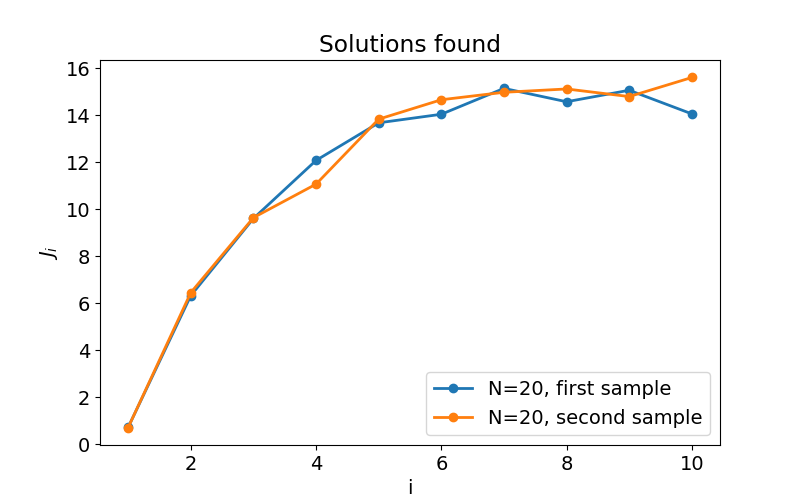

In [4]:
file1 = 'fixed_dim/jn20sample0.dat'
file2 = 'fixed_dim/jn20sample1.dat'

gg.plot_couplings([file1,file2], labels = ['N=20, first sample', 'N=20, second sample'], title = 'Solutions found')


The function ```plot_all_samples``` every solution in a provided directory.  

True

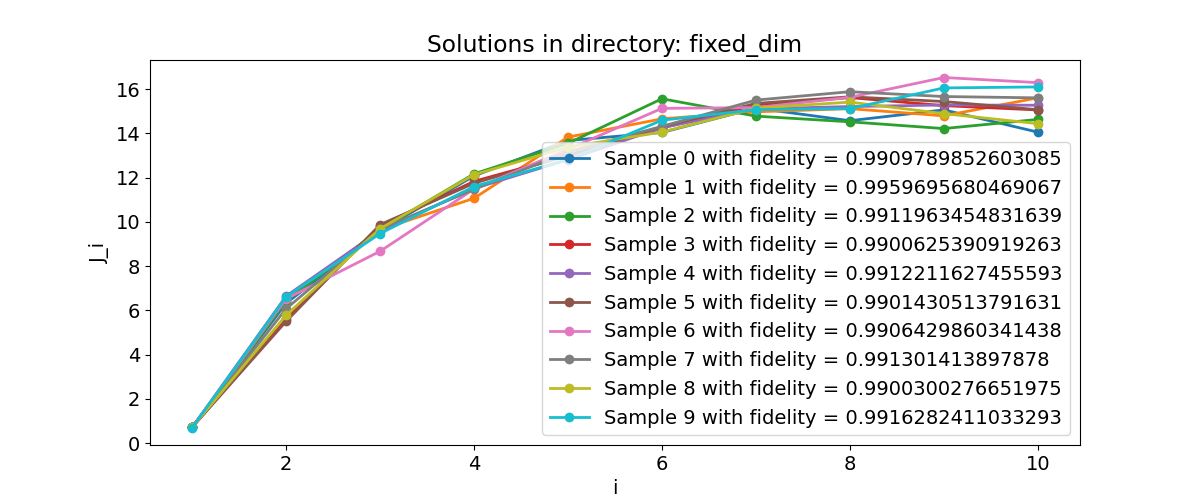

In [5]:
gg.plot_all_samples('fixed_dim',20)

If ```plot_all_samples``` is provided a 'fidelity limit' it will only plot solutions that provide fidelities above that value. 

True

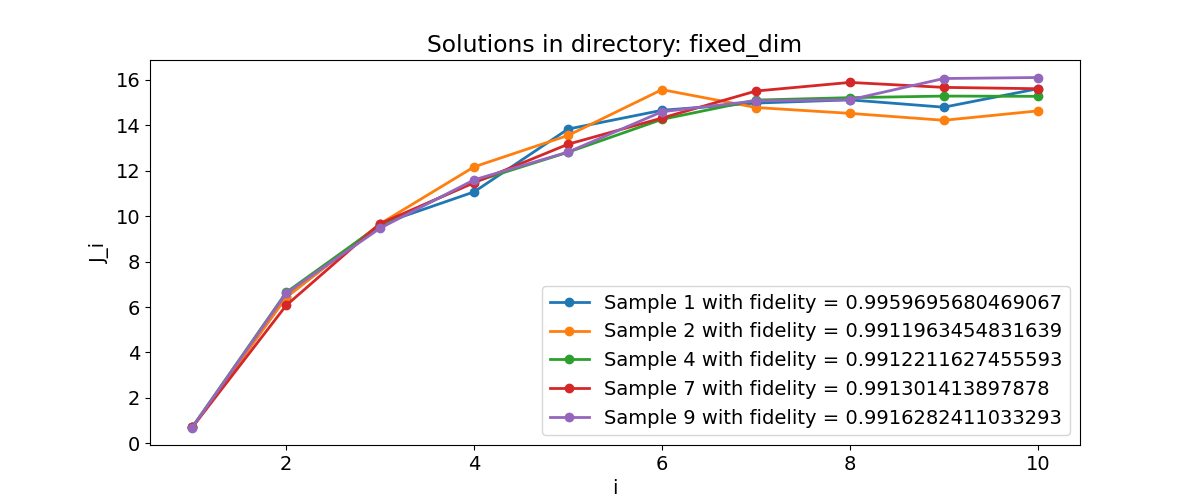

In [6]:
gg.plot_all_samples('fixed_dim',20,fid_limit=0.991)

Other available functions are:

- ```plot_spectrum```: plots energy spectrum for different solutions. 
- ```plot_energy_differences```:  plots normalized energy differences between successive energy levels

Both functions also save generated calculated energy spectrum in a provided directory, unless ```couplings``` option is set to False. In that case, provided files are interpreted as spectrum values, and eigenvalues are not calculated


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


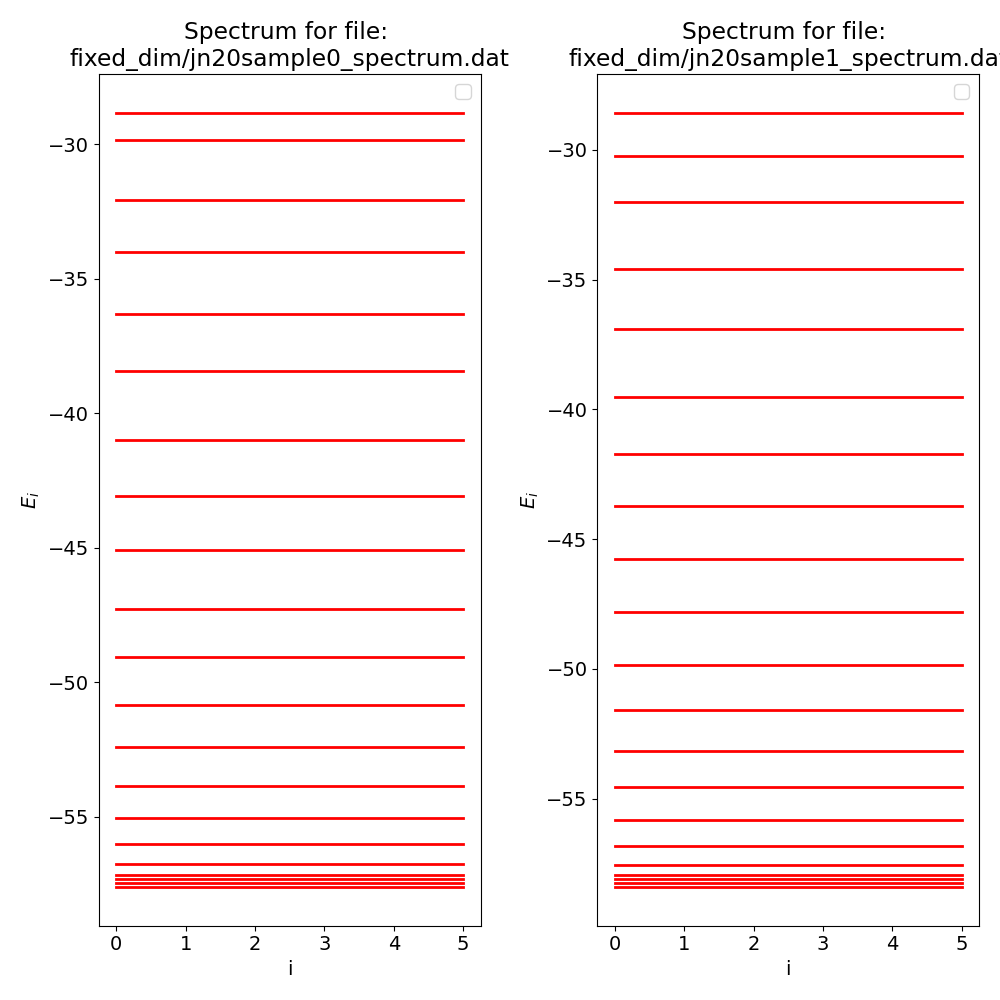

In [7]:
gg.plot_spectrum([file1,file2],couplings=True,directory='fixed_dim')

A simple loop can be implemented via command-line or, in this case, a jupyter notebook to run the experiment for different chain lengths. In that case, the results for every size are saved in the same directory.



In [8]:
dimensions = np.arange(20,50,5)
#for i in dimensions:
    
    #os.system('python3 exp_gen.py {} n_vs_fid_example'.format(i))

To analyze some of these results and perform statistics, it is convenient to use pandas dataframes. To do so, we have to extract the information from the ```nvsmaxfid.dat``` file. 

In [9]:
data_file = 'n_vs_fid_example/nvsmaxfid.dat'
column_names = ['dimension', 'delta', 'fidelity', 'time', 'generations']
example = pd.read_csv(data_file, delimiter = ' ', names = column_names)

The function ```summary_graph``` generates plots for mean, max and min fidelities and assigns a color coding to the point representing the generations needed to obtain each result. It also provides mean, max and min plots for CPU time and generations.

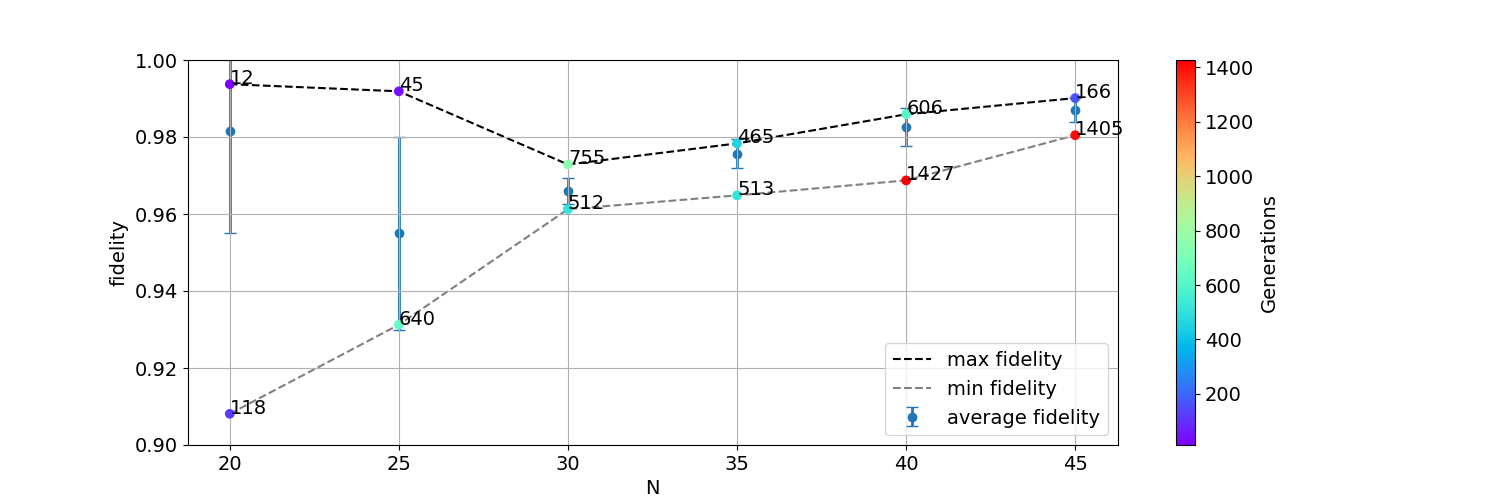

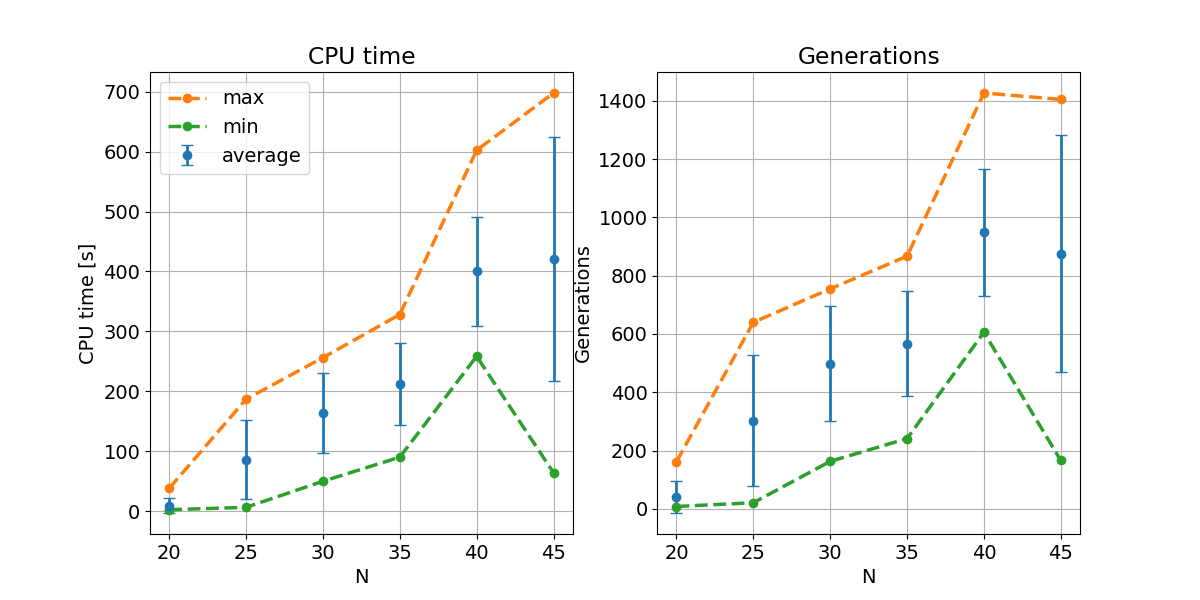

In [10]:
gg.summary_graph(example)

When an experiment is performed for different chain lengths, we may want to find the sample that provided a better transmission for each number of couplings. To do so, we can call the ```access_best_solutions``` function that generates a list with the filenames of the best solutions for each length.

Also, to plot solutions for different lengths it is possible to use ```plot_normalized_couplings``` that divides each value by the number of elements.

['n_vs_fid_example/jn20sample1.dat', 'n_vs_fid_example/jn25sample4.dat', 'n_vs_fid_example/jn30sample8.dat', 'n_vs_fid_example/jn35sample8.dat', 'n_vs_fid_example/jn40sample3.dat', 'n_vs_fid_example/jn45sample9.dat']


True

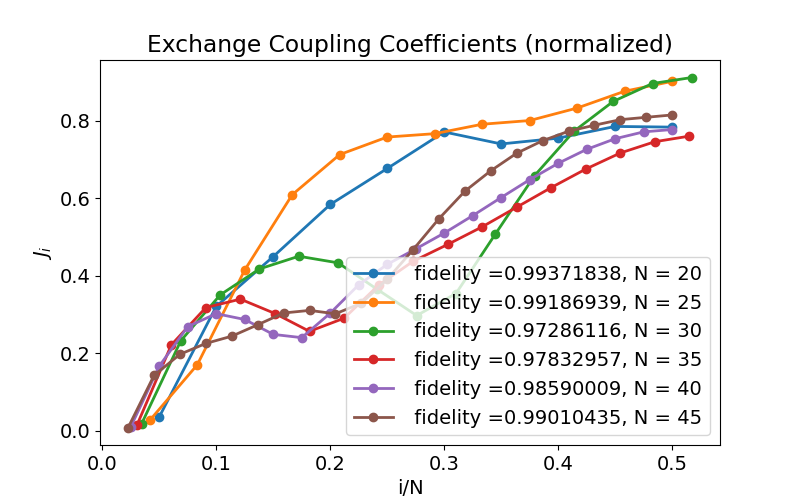

In [11]:
files,labels = gg.access_best_solutions(dataframe=example,directory='n_vs_fid_example',dimensions=dimensions,return_labels=True)
print(files)
gg.plot_normalized_couplings(files=files,labels=labels)

### Other available functions

#### To compare different experiments
If we have different experiments with different characteristics the following functions can be used to compare results of the corresponding dataframes

- ```compare_mean```: to compare mean value of fidelity (or CPU time / generations).
- ```compare_max_min```: to compare max. or min. value of fidelity (or CPU time / generations).
